### Import Libs

In [148]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [149]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [150]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


(28, 28)


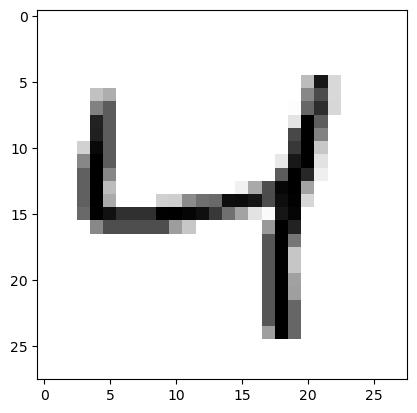

In [151]:
digit = train_images[2]
print(digit.shape)
plt.imshow(digit, cmap="binary")
plt.show()

### Prepare data

In [152]:
train_images = train_images.reshape((60000, 28 , 28,1))
test_images = test_images.reshape((10000, 28 , 28,1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Building Model

In [153]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train Model

In [154]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 252s 266ms/step - loss: 0.0845 - accuracy: 0.9750 - val_loss: 0.0544 - val_accuracy: 0.9853
Epoch 2/10
938/938 [==============================] - 250s 267ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0321 - val_accuracy: 0.9911
Epoch 3/10
938/938 [==============================] - 250s 266ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 251s 268ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0404 - val_accuracy: 0.9905
Epoch 5/10
938/938 [==============================] - 252s 269ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0300 - val_accuracy: 0.9915
Epoch 6/10
938/938 [==============================] - 251s 267ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0230 - val_accuracy: 0.9943
Epoch 7/10
938/938 [==============================] - 257s 274ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0396 -

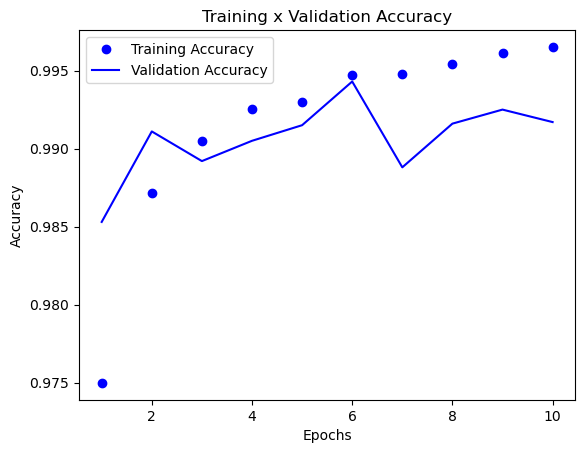

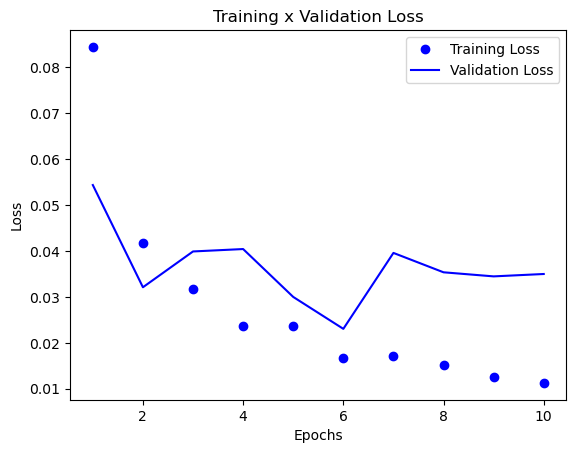

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training x Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training x Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [156]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 10s 31ms/step - loss: 0.0350 - accuracy: 0.9917
test_acc: 0.9916999936103821


In [157]:
predict_x = model.predict(test_images[0:1])
classes_x=np.argmax(predict_x,axis=1)
print("predicted labels : ",classes_x)
print("True labels : ",np.argmax(test_labels[0:1]))

1/1 [==============================] - 0s 148ms/step
predicted labels :  [7]
True labels :  7


In [158]:

arr=[10,20,30]
classes_x=np.argmax(arr)
print(classes_x)

2
